1.Pizza Place Sales
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients.

#**Recommended Analysis**
1.How many customers do we have each day? Are there any peak hours?
2.How many pizzas are typically in order? Do we have any bestsellers?
3.How much money did we make this year? Can we identify any seasonality in the sales?
4.Are there any pizzas we should take off the menu, or any promotions we could leverage?


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [22]:
df1=pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv")
df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [23]:
df2=pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv")
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [24]:
df3=pd.read_csv("/kaggle/input/pizza-place-sales/pizza_types.csv",encoding='unicode_escape')
df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [25]:
df4=pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv")
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [26]:
df1.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

In [27]:
df2.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [28]:
df3.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

In [29]:
df4.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [30]:
#merge df1 and df2 on basis of "Order_ID"

merged_df=pd.merge(df1,df2,on="order_id",how="inner")
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [31]:
#merge df3 and df4 on basis of "pizza_type_id"

pizza_info=pd.merge(df3,df4,on="pizza_type_id",how="inner")
pizza_info.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75


In [32]:
#merge merged_df and pizza_info on basis of "pizza_id"


final_df=pd.merge(merged_df,pizza_info,on="pizza_id",how="left")
final_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


In [33]:
final_df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [35]:
#now lets reduce the size

final_df["pizza_id"]=final_df["pizza_id"].astype("category")
final_df["pizza_type_id"]=final_df["pizza_type_id"].astype("category")
final_df["name"]=final_df["name"].astype("category")
final_df["category"]=final_df["category"].astype("category")
final_df["ingredients"]=final_df["ingredients"].astype("category")
final_df["size"]=final_df["size"].astype("category")
final_df.info() #Hence we have reduce memory size by 2MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_details_id  48620 non-null  int64   
 1   order_id          48620 non-null  int64   
 2   pizza_id          48620 non-null  category
 3   quantity          48620 non-null  int64   
 4   date              48620 non-null  object  
 5   time              48620 non-null  object  
 6   pizza_type_id     48620 non-null  category
 7   name              48620 non-null  category
 8   category          48620 non-null  category
 9   ingredients       48620 non-null  category
 10  size              48620 non-null  category
 11  price             48620 non-null  float64 
dtypes: category(6), float64(1), int64(3), object(2)
memory usage: 2.5+ MB


In [36]:
final_df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


# 1.How many customers do we have each day? Are there any peak hours?

In [37]:
# Convert 'date' and 'time' columns to datetime objects
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['time'] = pd.to_datetime(final_df['time'])

# Extract date and hour from the datetime columns
final_df['order_date'] = final_df['date'].dt.date
final_df['order_hour'] = final_df['time'].dt.hour

# Count the number of unique customers each day
daily_customers = final_df.groupby('order_date')['order_id'].nunique()

# Find peak hours
peak_hours = final_df.groupby('order_hour')['order_id'].nunique()

# Find the hour(s) with the maximum number of orders
max_orders_hour = peak_hours.idxmax()
max_orders_count = peak_hours.max()

# Print the number of customers each day and peak hours
print("Number of customers each day:")
print(daily_customers)

print("\nPeak Hours:")
print(peak_hours)

print(f"\nPeak hour(s) with the most orders: {max_orders_hour} with {max_orders_count} orders")


/tmp/ipykernel_34/1273682334.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['time'] = pd.to_datetime(final_df['time'])


Number of customers each day:
order_date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Name: order_id, Length: 358, dtype: int64

Peak Hours:
order_hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: order_id, dtype: int64

Peak hour(s) with the most orders: 12 with 2520 orders


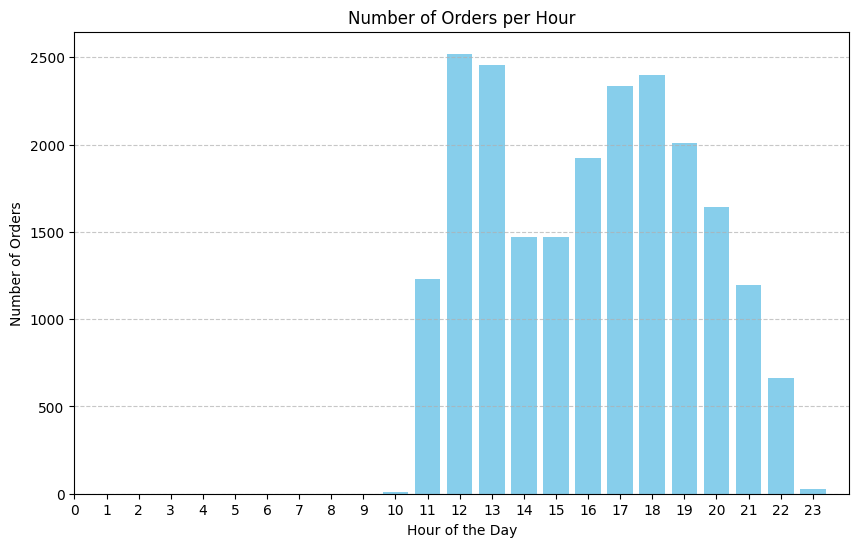

In [38]:
import matplotlib.pyplot as plt

# Plot peak hours
plt.figure(figsize=(10, 6))
plt.bar(peak_hours.index, peak_hours.values, color='skyblue')
plt.title('Number of Orders per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2.How many pizzas are typically in order? Do we have any bestsellers?
# 

In [39]:
# Calculate the average number of pizzas per order
average_pizzas_per_order = final_df.groupby('order_id')['quantity'].sum().mean()

# Identify bestsellers based on total quantity sold for each pizza type
bestsellers = final_df.groupby('name')['quantity'].sum().sort_values(ascending=False)

# Print results
print(f"Average number of pizzas per order: {average_pizzas_per_order:.2f}")
print("\nBestsellers:")
print(bestsellers.head())

Average number of pizzas per order: 2.32

Bestsellers:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


/tmp/ipykernel_34/3645421096.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bestsellers = final_df.groupby('name')['quantity'].sum().sort_values(ascending=False)


/tmp/ipykernel_34/2586201891.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bestsellers = final_df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)


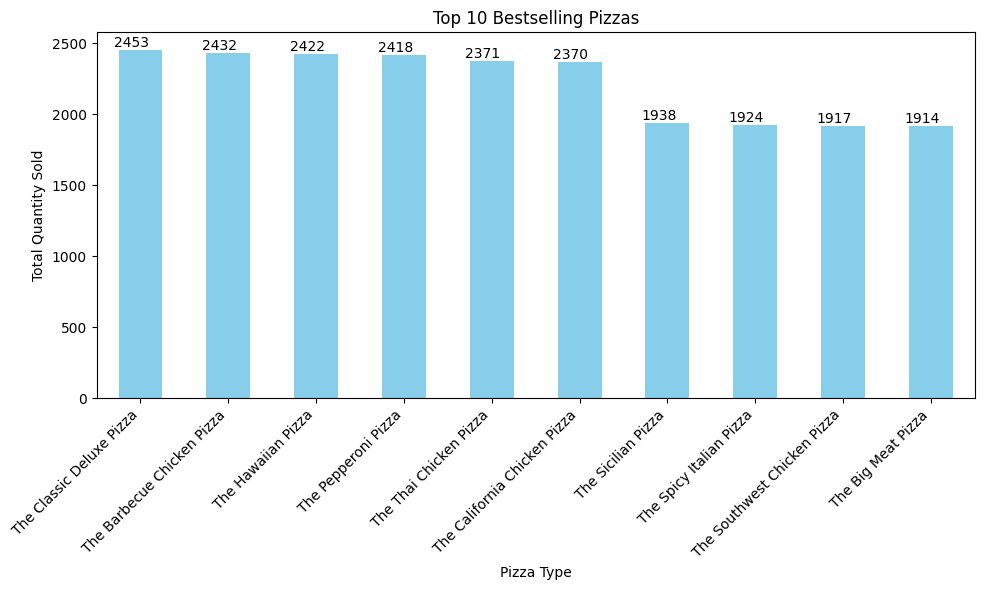

In [40]:
import matplotlib.pyplot as plt

# Identify bestsellers based on total quantity sold for each pizza type
bestsellers = final_df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
bars = bestsellers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Bestselling Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 3.How much money did we make this year? Can we identify any seasonality in the sales?
# 

In [41]:
# Calculate the sales amount for each order
final_df['total_sales'] = final_df['quantity'] * final_df['price']

# Group the sales data by month
sales_by_month = final_df.groupby(final_df['date'].dt.to_period('M'))['total_sales'].sum()
sales_by_month


date
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: total_sales, dtype: float64

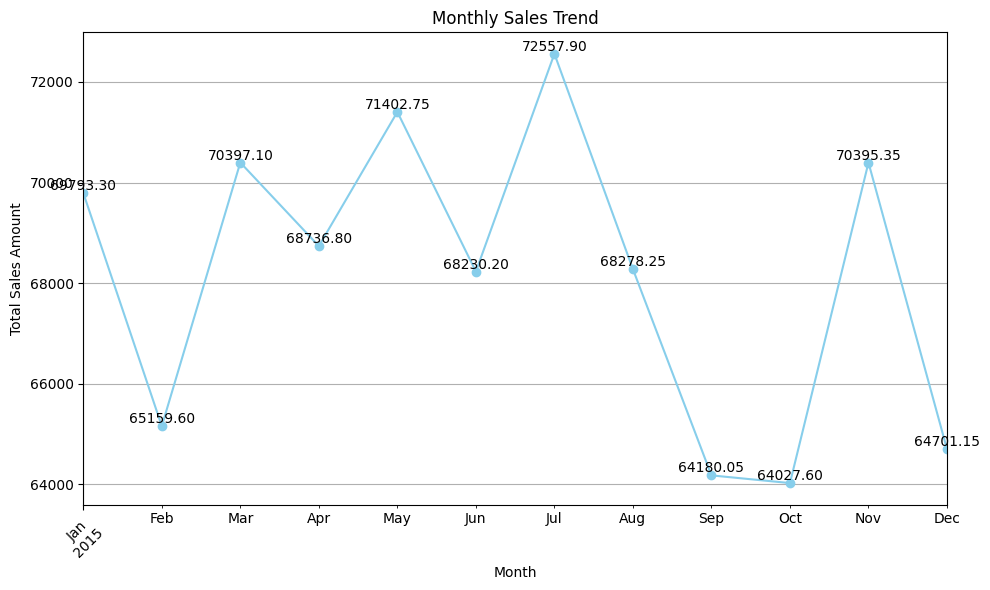

In [42]:
# Visualize the sales trend over the year with data labels
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o', color='skyblue')

# Add data labels
for i, sales in enumerate(sales_by_month):
    plt.text(sales_by_month.index[i].strftime('%b %Y'), sales, f'{sales:.2f}', ha='center', va='bottom')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 4.Are there any pizzas we should take off the menu, or any promotions we could leverage?
# 

In [43]:
# Calculate total sales and profit for each pizza type
pizza_sales = final_df.groupby('name', observed=True)[['quantity', 'total_sales']].sum()  # Use list instead of tuple
pizza_profit = final_df.groupby('name', observed=True)['total_sales'].sum() - final_df.groupby('name', observed=True)['quantity'].sum() * final_df.groupby('name', observed=True)['price'].mean()
pizza_sales


,quantity,total_sales
name,,
The Barbecue Chicken Pizza,2432,42768.00
The Big Meat Pizza,1914,22968.00
The Brie Carre Pizza,490,11588.50
The Calabrese Pizza,937,15934.25
The California Chicken Pizza,2370,41409.50
The Chicken Alfredo Pizza,987,16900.25
The Chicken Pesto Pizza,973,16701.75
The Classic Deluxe Pizza,2453,38180.50
The Five Cheese Pizza,1409,26066.50


In [44]:
pizza_profit

name
The Barbecue Chicken Pizza                    30.623946
The Big Meat Pizza                             0.000000
The Brie Carre Pizza                           0.000000
The Calabrese Pizza                            0.448759
The California Chicken Pizza                  56.500434
The Chicken Alfredo Pizza                      1.400000
The Chicken Pesto Pizza                       11.155047
The Classic Deluxe Pizza                     -27.310224
The Five Cheese Pizza                          0.000000
The Four Cheese Pizza                         23.098811
The Greek Pizza                                3.501138
The Green Garden Pizza                        -3.765198
The Hawaiian Pizza                            19.005907
The Italian Capocollo Pizza                   34.256719
The Italian Supreme Pizza                     -1.440914
The Italian Vegetables Pizza                  -9.535385
The Mediterranean Pizza                       16.792524
The Mexicana Pizza                         

In [45]:
# Define the threshold for total sales and total profit
sales_threshold = 20000  # Minimum total sales threshold
profit_threshold = 0  # Minimum total profit threshold (could be negative)

# Combine sales and profit data
pizza_performance = pd.concat([pizza_sales, pizza_profit.rename('total_profit')], axis=1)

# Identify underperforming pizzas
underperforming_pizzas = pizza_performance[pizza_performance['quantity'] < sales_threshold]  # Using sales threshold for underperformance

# Identify pizzas with high profit margins
high_profit_pizzas = pizza_performance[pizza_performance['total_profit'] > profit_threshold]  # Using profit threshold for high-profit pizzas

# Print results
print("Underperforming Pizzas:")
print(underperforming_pizzas)

print("\nHigh Profit Margin Pizzas:")
print(high_profit_pizzas)


Underperforming Pizzas:
                                            quantity  total_sales  \
name                                                                
The Barbecue Chicken Pizza                      2432     42768.00   
The Big Meat Pizza                              1914     22968.00   
The Brie Carre Pizza                             490     11588.50   
The Calabrese Pizza                              937     15934.25   
The California Chicken Pizza                    2370     41409.50   
The Chicken Alfredo Pizza                        987     16900.25   
The Chicken Pesto Pizza                          973     16701.75   
The Classic Deluxe Pizza                        2453     38180.50   
The Five Cheese Pizza                           1409     26066.50   
The Four Cheese Pizza                           1902     32265.70   
The Greek Pizza                                 1420     28454.10   
The Green Garden Pizza                           997     13955.75   
The Hawaii

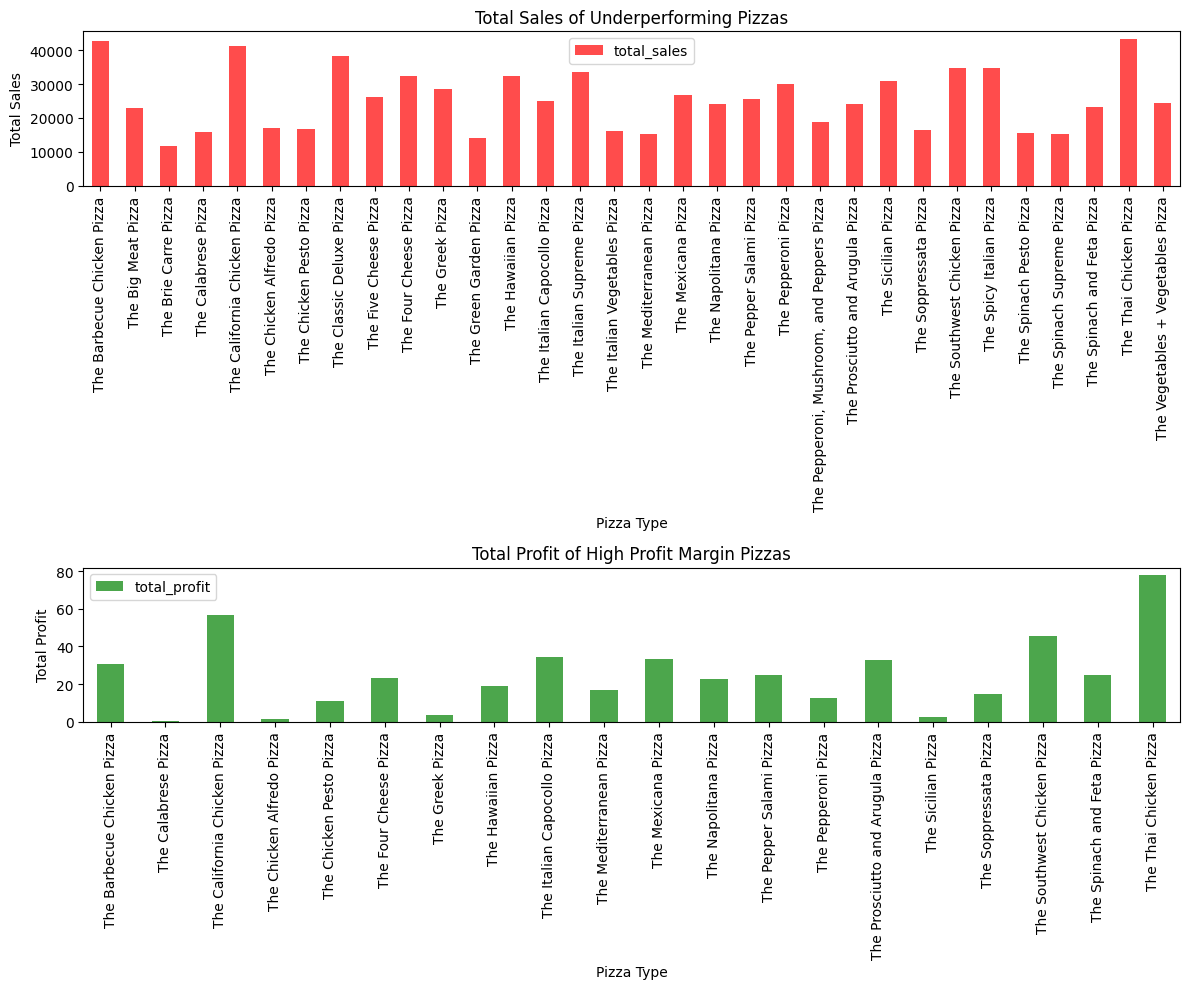

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot total sales for each pizza type
underperforming_pizzas.plot(kind='bar', y='total_sales', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Total Sales of Underperforming Pizzas')
axes[0].set_xlabel('Pizza Type')
axes[0].set_ylabel('Total Sales')

# Plot total profit for each pizza type
high_profit_pizzas.plot(kind='bar', y='total_profit', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Total Profit of High Profit Margin Pizzas')
axes[1].set_xlabel('Pizza Type')
axes[1].set_ylabel('Total Profit')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
